- entropy 信息熵
- gini 基尼系数

In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
target = wine.target

In [7]:
np.unique(target)

array([0, 1, 2])

In [8]:
data = pd.concat([pd.DataFrame(data=wine.data, columns=wine.feature_names), pd.DataFrame(wine.target)], axis=1)
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
data = data.rename(columns={0: "target"})

In [10]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [12]:
x_train.shape

(124, 13)

In [13]:
x_train

array([[1.303e+01, 9.000e-01, 1.710e+00, ..., 1.190e+00, 2.480e+00,
        3.920e+02],
       [1.237e+01, 1.170e+00, 1.920e+00, ..., 1.120e+00, 3.480e+00,
        5.100e+02],
       [1.378e+01, 2.760e+00, 2.300e+00, ..., 7.000e-01, 1.680e+00,
        6.150e+02],
       ...,
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.348e+01, 1.810e+00, 2.410e+00, ..., 1.040e+00, 3.470e+00,
        9.200e+02],
       [1.317e+01, 5.190e+00, 2.320e+00, ..., 6.000e-01, 1.480e+00,
        7.250e+02]])

In [30]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

In [31]:
score

0.9629629629629629

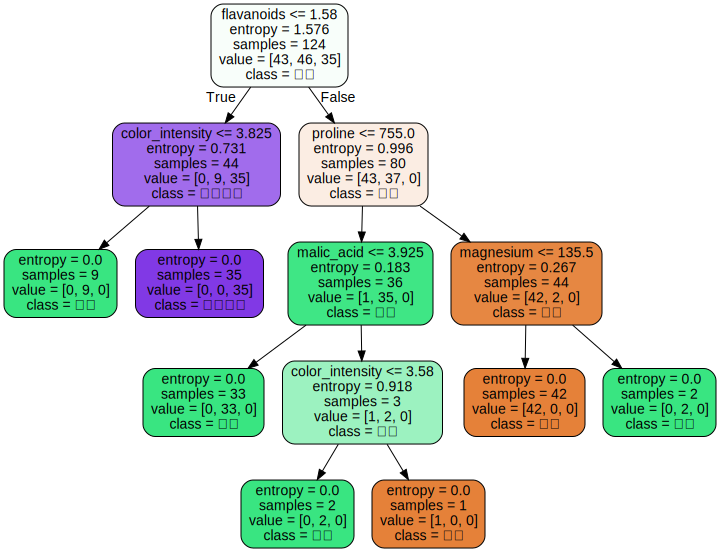

In [16]:
import graphviz  # noqa

feature_name = wine.feature_names
dot_data = tree.export_graphviz(
    clf,
    feature_names=feature_name,
    class_names=["琴酒", "雪梨", "贝尔摩德"],
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [17]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
clf.feature_importances_

array([0.        , 0.01964103, 0.        , 0.        , 0.06007538,
       0.        , 0.42760473, 0.        , 0.        , 0.17870434,
       0.        , 0.        , 0.31397453])

In [19]:
[*zip(feature_name, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.01964102619526638),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.06007537695502586),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4276047264587922),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.17870434295348836),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.31397452743742704)]